# **Prediccion de Insuficiencia Cardiaca**

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

**Contexto**

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial y se stima que cobran 17.9 millones de vidas cada año, lo que representa el 31% de todas las muertes en todo el mundo. Cuatro de cada cindo muertes por ECV se deben a ataques cardìacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años. La insuficiencia cardíaca es un evento común causado por enfermedades cardiovasculares y este conjunto de datos contiene 11 características que pueden usarse para predecir una posible enfermedad cardíaca.

Las personas con enfermedades cardiovasculares o que tienen un alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y un manejo tempranos, donde un modelo de aprendizaje automático puede ser de gran ayuda.

**Información de atributos**

1. Age: Edad del paciente(años)
2. Sex: sexo del paciente(M:Masculino, F:Femenino)
3. ChestPainType: Tipo de dolor en el pecho(TA: angina típica, ATA: angina atípica, NAP: dolor no anginoso, ASY: asintomático)
4. RestingBP: Presión arterial en reposo (mmHg)
5. Cholesterol: Colesterol sérico(mm/dl)
6. FastingBS: Azucar en sangre en ayunas (1: si FastingBS> 120 mg/dl, 0: en caso contrario)
7. RestingECG:  resultados del electrocardiograma en reposo(Normal: normal, ST: con anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de> 0,05 mV), HVI: muestra probable o definitiva hipertrofia ventricular izquierda por Estes' criterios)
8. MaxHR: Frecuencia cardiaca maxima alcanzada (entre 60 y 202)
9. ExerciseAngina: Angina inducida por el ejercicio(Y:si,N:No)
10. Oldpeak: oldpeak = ST [Valor numérico medido en depresión]
11. ST_Slope: la pendiente del segmento ST del ejercicio máximo (Arriba: ascendente, Plano: plano, Abajo: descendente)
12. HeartDisease: Clase de salida (1:enfermedad cardíaca, 0:normal)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/llanosrenzo/MachineLearning/ecv/heart.csv',
                 sep=',',
                 na_values={'RestingBP':0,'Cholesterol':0})
display(df.head())
print(df.shape)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


(918, 12)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     746 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB


2. **Limpieza de datos**

* Detección y manejo de duplicados

In [4]:
# Identificar datos duplicados:
# =========================================================
duplicados = df[df.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


* Manejo de valores faltantes

In [5]:
# Instalamos la librería Missigno
# !pip install Missigno

In [6]:
import missingno

In [7]:
def report_missings(data):
    
    porc_valores_perdidos = round((data.isnull().sum(axis=0).sort_values(ascending=False)/len(data))*3,ndigits=3)
    cant_valores_perdidos = data.isnull().sum(axis=0).sort_values(ascending= False)
    df_valores_perdidos = pd.concat([cant_valores_perdidos,porc_valores_perdidos],axis = 'columns').reset_index()
    df_valores_perdidos.columns = ['Variables','Cant. Nulos','% Nulos']
    df_valores_perdidos['Cant. No Nulos'] = len(data) - df_valores_perdidos['Cant. Nulos']
    
    print('='*100)
    print('*'*32,'Descripción de Valores Perdidos','*'*32)
    print('='*100)
    print('\n',df_valores_perdidos,'\n')
    
    import seaborn as sns
    df_perd = pd.DataFrame(df_valores_perdidos,columns=['Variables','cant_nulos','porc_nulos','cant_no_nulos'])
    
    fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols = 2,figsize =(20,8))
    
    sns.barplot(data = df_perd,x='Variables',y='porc_nulos',ax=ax1)
    ax1.set_ylabel('Porcentaje de datos faltantes(%)')
    ax1.set_ylim(0,100)
    ax1.set_title('Porcentaje de datos faltantes por variables',fontweight='bold')
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation= 45)

    
    sns.heatmap(data= data.isnull().T,ax=ax2,cmap='viridis')
    ax2.set_title('Distribución de valores perdidos',fontweight='bold')

    
    import missingno
    missingno.heatmap(data,ax = ax3,cmap='cividis',vmin=0,fontsize = 12)
    ax3.set_title('Correlación de nulidad entre variables',fontweight='bold')
    
    missingno.dendrogram(data,ax=ax4,fontsize = 12)
    ax4.set_title('Dendograma basado en la correlación de valores faltantes',fontweight='bold')
    #ax4.set_ylim([0, 1.1])
    ax4.grid(True)
    
    plt.tight_layout()
    plt.show()

******************************** Descripción de Valores Perdidos ********************************

          Variables  Cant. Nulos  % Nulos  Cant. No Nulos
0      Cholesterol          172    0.562             746
1        RestingBP            1    0.003             917
2              Age            0    0.000             918
3              Sex            0    0.000             918
4    ChestPainType            0    0.000             918
5        FastingBS            0    0.000             918
6       RestingECG            0    0.000             918
7            MaxHR            0    0.000             918
8   ExerciseAngina            0    0.000             918
9          Oldpeak            0    0.000             918
10        ST_Slope            0    0.000             918
11    HeartDisease            0    0.000             918 



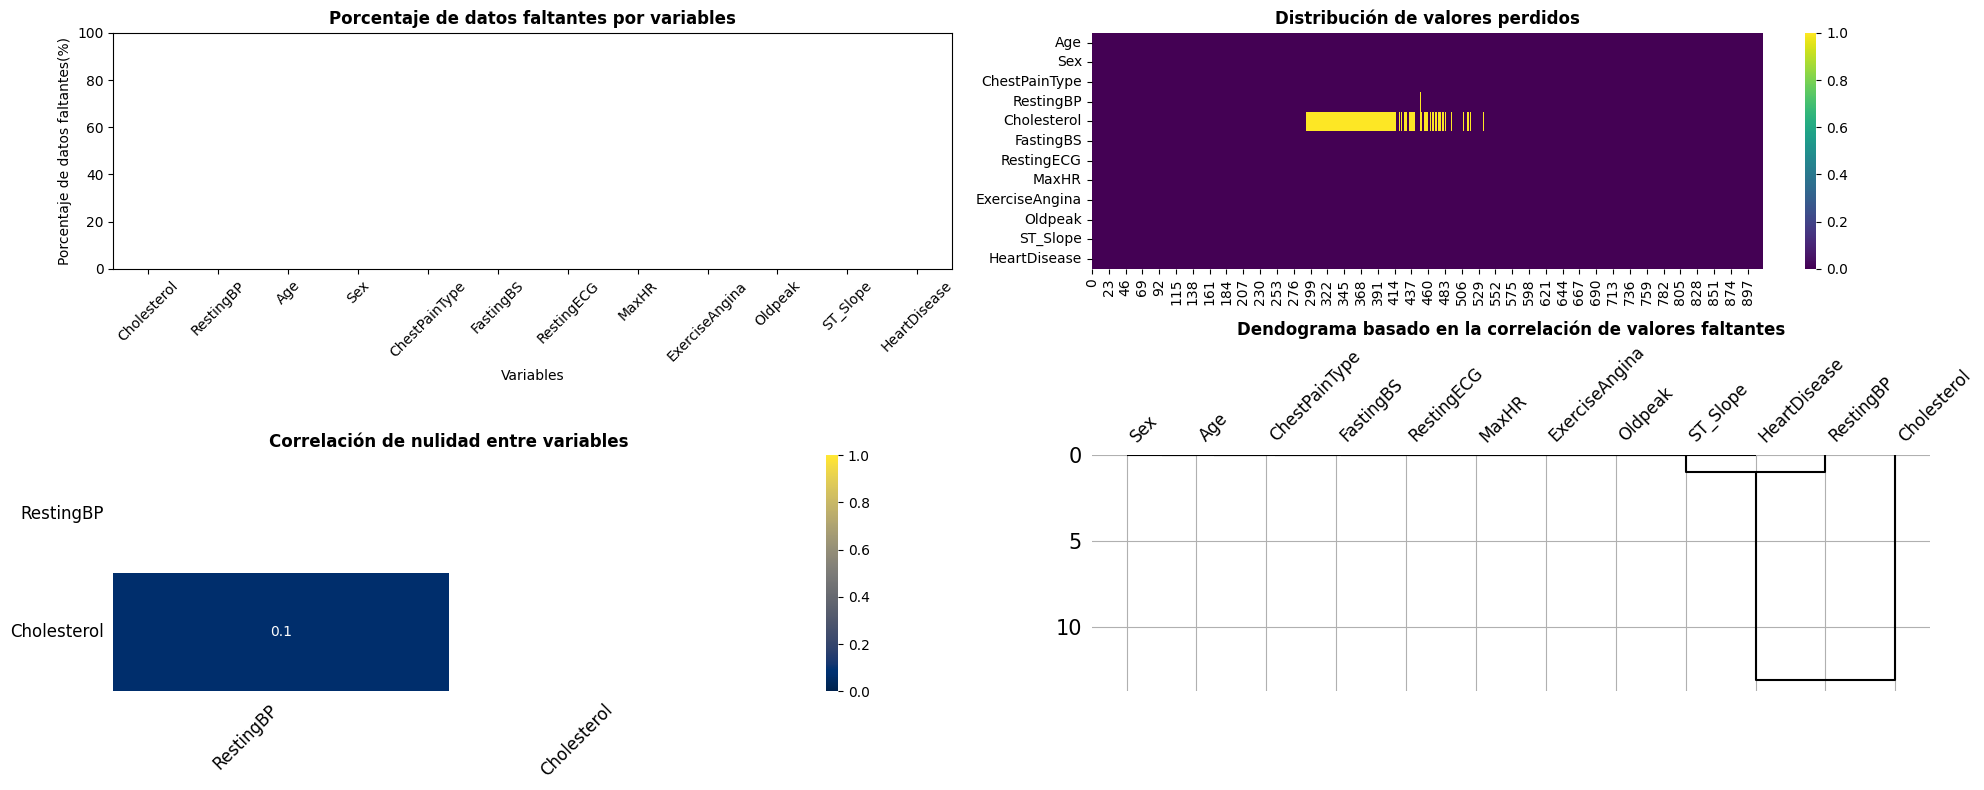

In [8]:
report_missings(df)

Seleccionamos a las columnas que tenga `valores perdidos`

In [9]:
# Identificar a las columnas con valores perdidos
# =========================================================================
columns_na = df.columns[df.isnull().any()].tolist()

# Mostrar las columnas con valores perdidos
# =========================================================================
print(columns_na)

['RestingBP', 'Cholesterol']


* Imputación con `kNNImputer` 

In [10]:
from sklearn.impute import KNNImputer

In [11]:
imputer_knn = KNNImputer(n_neighbors=10,
                         weights='distance',
                         metric='nan_euclidean')
data_imputed = imputer_knn.fit_transform(df[columns_na])

In [12]:
# Transformar el resultado a un DataFrame
# =========================================================================
df_imp = pd.DataFrame(data_imputed,columns=columns_na)
display(df_imp.tail())

,RestingBP,Cholesterol
913,110.0,264.0
914,144.0,193.0
915,130.0,131.0
916,130.0,236.0
917,138.0,175.0


In [13]:
# Concatenar el DataFrame imputado con el original
# ========================================================================
df = pd.concat([df.drop(columns=columns_na),df_imp],axis='columns')
df.head()

,Age,Sex,ChestPainType,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP,Cholesterol
0,40,M,ATA,0,Normal,172,N,0.0,Up,0,140.0,289.0
1,49,F,NAP,0,Normal,156,N,1.0,Flat,1,160.0,180.0
2,37,M,ATA,0,ST,98,N,0.0,Up,0,130.0,283.0
3,48,F,ASY,0,Normal,108,Y,1.5,Flat,1,138.0,214.0
4,54,M,NAP,0,Normal,122,N,0.0,Up,0,150.0,195.0


In [14]:
# Convertir las columnas a minusculas
#  ========================================================
df.columns = df.columns.str.lower()

In [15]:
variables_categoricas = df.select_dtypes(exclude='number').columns.values
print(f'Tenemos a la variables categoricas: {variables_categoricas}')
print(len(variables_categoricas))

Tenemos a la variables categoricas: ['sex' 'chestpaintype' 'restingecg' 'exerciseangina' 'st_slope']
5


In [16]:
variables_numericas = df.select_dtypes(include='number').columns.values
print(f'Tenemos a la variables numericas: {variables_numericas}')
print(len(variables_numericas))

Tenemos a la variables numericas: ['age' 'fastingbs' 'maxhr' 'oldpeak' 'heartdisease' 'restingbp'
 'cholesterol']
7


3. **Análisis Univariado**

* Estadística descriptiva

In [17]:
# resumen estadistico descriptivo
# =================================================================
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,918.0,NaN,NaN,NaN,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0
sex,918,2,M,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chestpaintype,918,4,ASY,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fastingbs,918.0,NaN,NaN,NaN,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0
restingecg,918,3,Normal,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maxhr,918.0,NaN,NaN,NaN,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
exerciseangina,918,2,N,547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,918.0,NaN,NaN,NaN,0.887364,1.06657,-2.6,0.0,0.6,1.5,6.2
st_slope,918,3,Flat,460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heartdisease,918.0,NaN,NaN,NaN,0.553377,0.497414,0.0,0.0,1.0,1.0,1.0


* Visualizaciones

`Variables Categoricas`

sex

In [18]:
tab_sex = df['sex'].value_counts(normalize=True,dropna=False)*100
tab_sex = tab_sex.reset_index()
tab_sex.columns = ['sexo','Frecuencia relativa']
tab_sex

,sexo,Frecuencia relativa
0,M,78.976035
1,F,21.023965


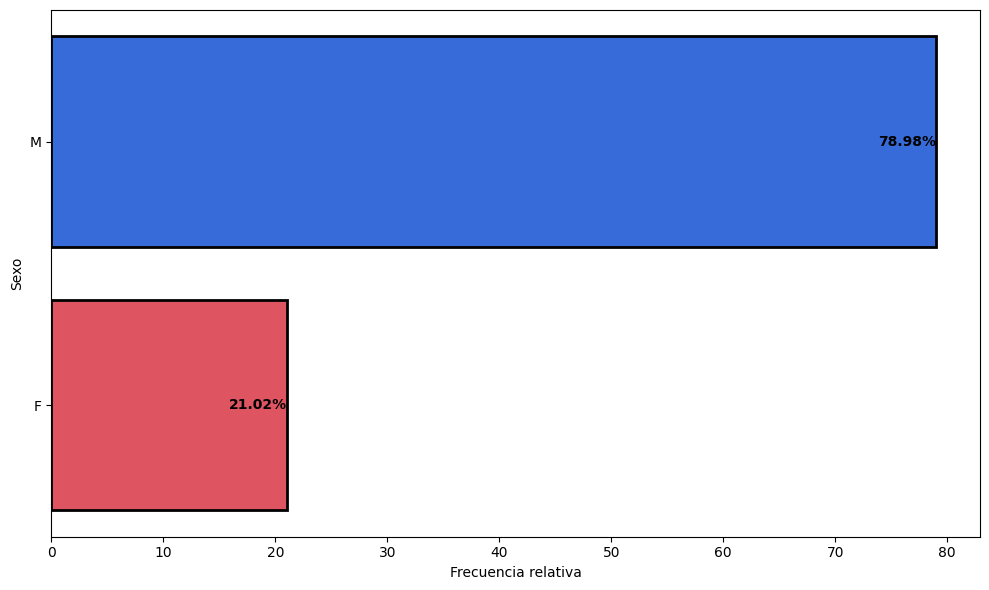

In [49]:
# Suponiendo que 'tab_sex' es tu DataFrame y 'sexo' y 'Frecuencia relativa' son las columnas
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras
sns.barplot(data=tab_sex, y='sexo', x='Frecuencia relativa',
            palette=['#1D61F5','#F53D4D'],edgecolor='black',linewidth=2)
plt.ylabel('Sexo')
# Añadir porcentaje a las barras
for index, value in enumerate(tab_sex['Frecuencia relativa']):
    percentage = '{:.2f}%'.format(value )  # Calcular el porcentaje
    plt.text(value, index, percentage, ha='right', va='center', fontsize=10,fontweight='bold')  # Mostrar el porcentaje en la barra
plt.tight_layout()
plt.show()


 chestpaintype

In [20]:
tab_chestpaintype = df['chestpaintype'].value_counts(normalize=True)*100
tab_chestpaintype = tab_chestpaintype.reset_index()
tab_chestpaintype.columns= ['chestpaintype','Frecuencia relativa']
tab_chestpaintype

,chestpaintype,Frecuencia relativa
0,ASY,54.030501
1,NAP,22.113290
2,ATA,18.845316
3,TA,5.010893


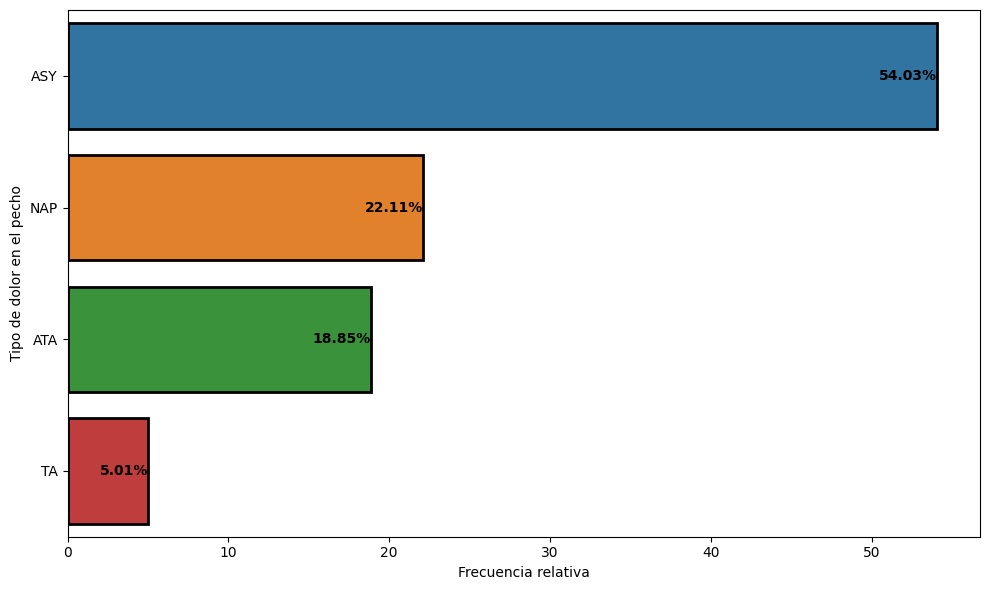

In [48]:
fig ,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=tab_chestpaintype,y='chestpaintype',x='Frecuencia relativa',edgecolor='black',linewidth=2)
sns.color_palette('bright')
plt.ylabel('Tipo de dolor en el pecho')
for index,value in enumerate(tab_chestpaintype['Frecuencia relativa']):
    porcentaje = '{:.2f}%'.format(value)
    plt.text(value,index,porcentaje,ha='right',va='center',fontsize=10,fontweight='bold')
plt.tight_layout()
plt.show()

restingecg

In [24]:
tab_restingecg = df['restingecg'].value_counts(normalize=True)
tab_restingecg = tab_restingecg.reset_index()
tab_restingecg.columns = ['restingecg','Frecuencia relativa']
tab_restingecg

,restingecg,Frecuencia relativa
0,Normal,0.601307
1,LVH,0.204793
2,ST,0.193900


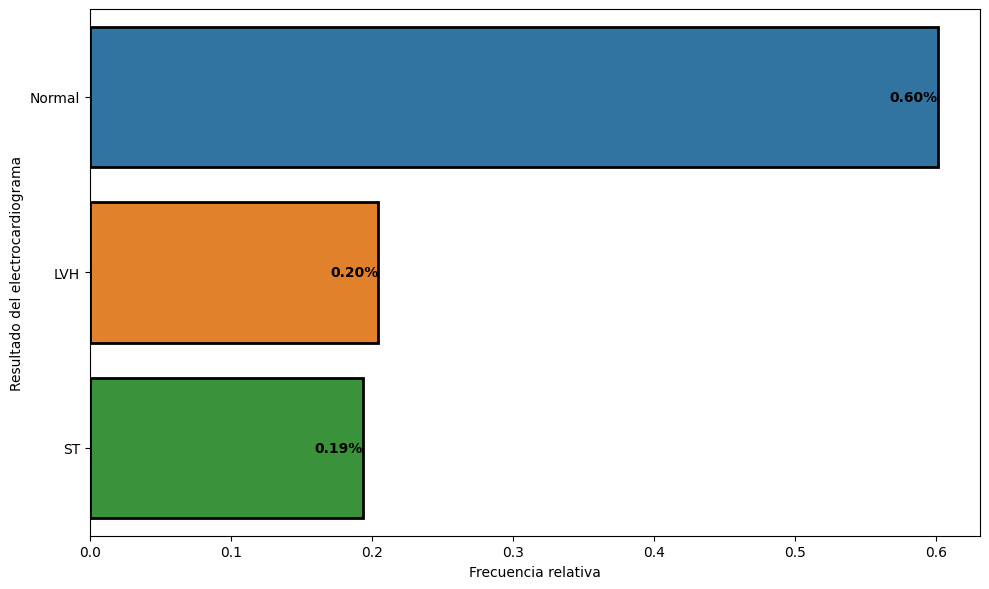

In [47]:
fig,ax = plt.subplots(figsize = (10,6))
sns.barplot(data=tab_restingecg,y='restingecg',x='Frecuencia relativa',edgecolor = 'black',linewidth=2)
plt.ylabel('Resultado del electrocardiograma')
for index,value in enumerate(tab_restingecg['Frecuencia relativa']):
    porcentaje = '{:.2f}%'.format(value)
    plt.text(value,index,porcentaje,ha='right',va='center',fontsize= 10,fontweight='bold')
    plt.tight_layout()
plt.tight_layout()
plt.show()

* exerciseangina

In [59]:
tab_exerciseangina = df['exerciseangina'].value_counts(normalize=True)*100
tab_exerciseangina = tab_exerciseangina.reset_index()
tab_exerciseangina.columns = ['exerciseangina','Frecuencia relativa']
tab_exerciseangina

,exerciseangina,Frecuencia relativa
0,N,59.586057
1,Y,40.413943


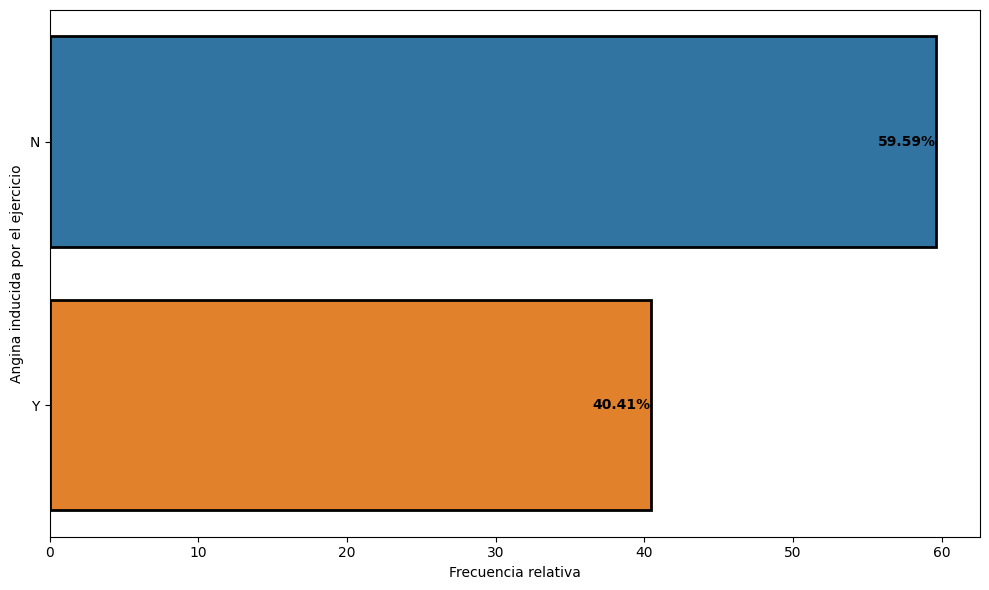

In [60]:
fig,ax = plt.subplots(figsize = (10,6))
sns.barplot(data= tab_exerciseangina,y='exerciseangina',x='Frecuencia relativa',edgecolor='black',linewidth=2)
plt.ylabel('Angina inducida por el ejercicio')
for index,value in enumerate(tab_exerciseangina['Frecuencia relativa']):
    porcentaje = '{:.2f}%'.format(value)
    plt.text(value,index,porcentaje,ha='right',va='center',fontsize=10,fontweight='bold')
    plt.tight_layout()
plt.tight_layout()
plt.show()

st_slope

In [57]:
tab_st_slope = df['st_slope'].value_counts(normalize=True)*100
tab_st_slope = tab_st_slope.reset_index()
tab_st_slope.columns = ['st_slope','Frecuencia relativa']
tab_st_slope

,st_slope,Frecuencia relativa
0,Flat,50.108932
1,Up,43.028322
2,Down,6.862745


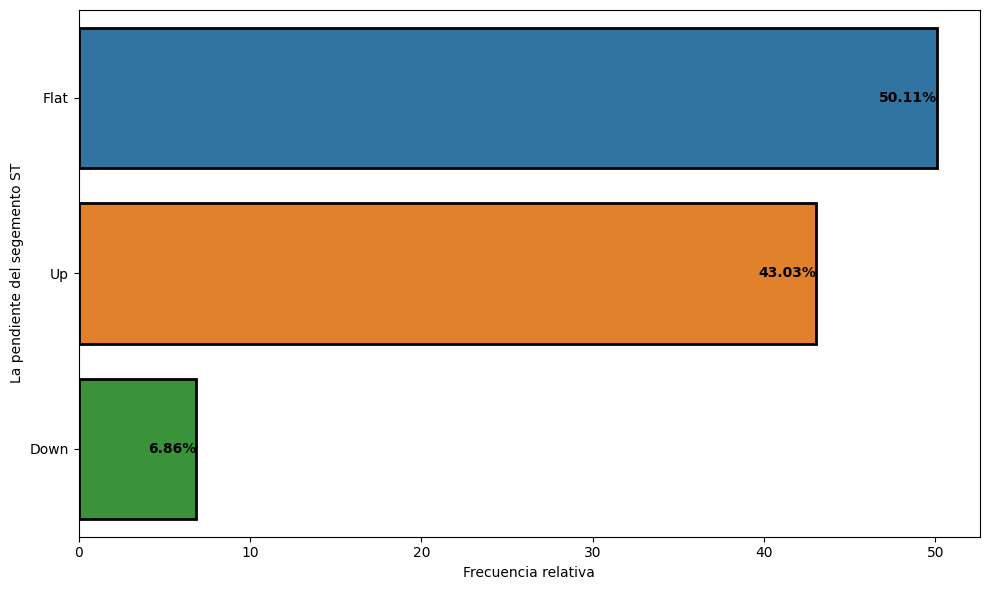

In [58]:
fig ,ax = plt.subplots(figsize =(10,6))
sns.barplot(data=tab_st_slope,y = 'st_slope',x= 'Frecuencia relativa',edgecolor ='black',linewidth=2)
plt.ylabel('La pendiente del segemento ST')
for index,value in enumerate(tab_st_slope['Frecuencia relativa']):
    porcentaje = '{:.2f}%'.format(value)
    plt.text(value,index,porcentaje,ha='right',va='center',fontsize=10,fontweight= 'bold')
plt.tight_layout()
plt.show()

`Variables Numericas`

age

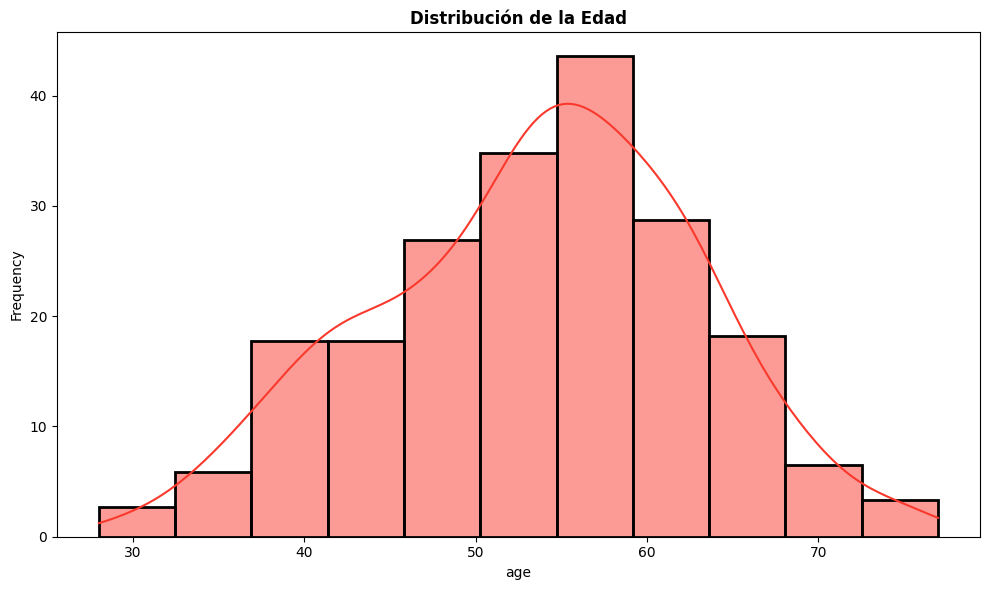

In [86]:
fig,ax = plt.subplots(figsize = (10,6))
sns.histplot(data= df,x='age',bins = 'sturges',
             edgecolor='black',
             linewidth=2,
             color='#FA392D',
             kde=True,
             stat='frequency')
plt.title('Distribución de la Edad',fontweight='bold')
plt.tight_layout()
plt.show()

fastingbs

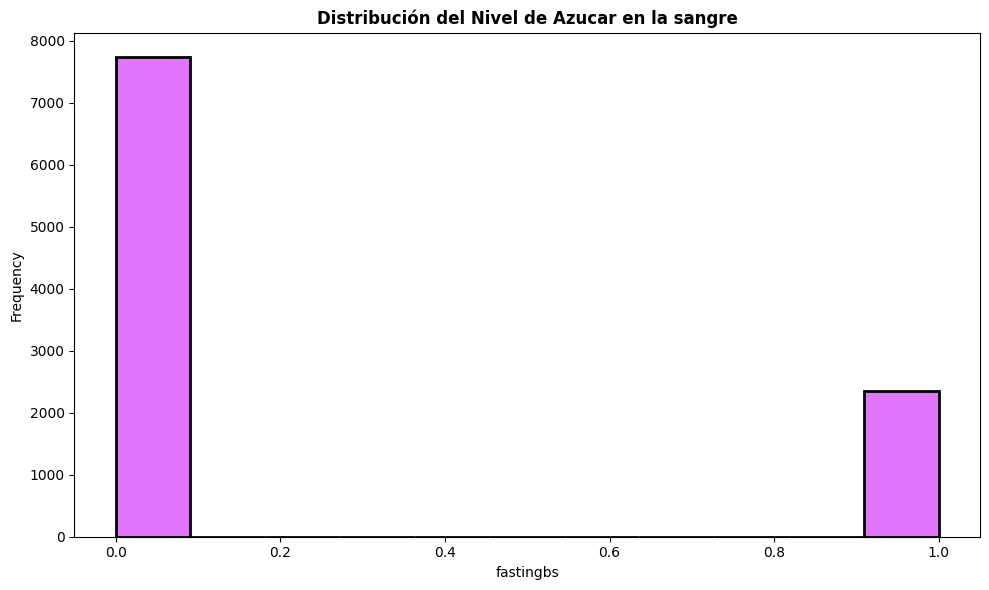

In [92]:
fig,ax = plt.subplots(figsize = (10,6))
sns.histplot(data= df,x='fastingbs',edgecolor='black',
             linewidth=2,
             color='#D548FA',
             stat='frequency')
plt.title('Distribución del Nivel de Azucar en la sangre',fontweight='bold')
plt.tight_layout()
plt.show()

maxhr

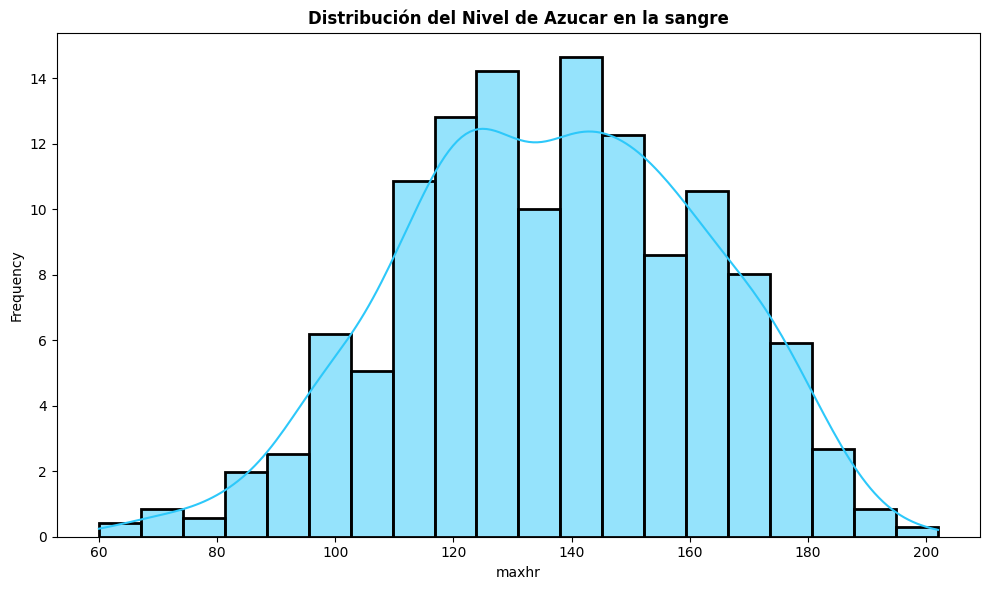

In [96]:
fig,ax = plt.subplots(figsize = (10,6))
sns.histplot(data= df,x='maxhr',edgecolor='black',
             linewidth=2,
             color='#2DC8FA',
             stat='frequency',
             kde=True)
plt.title('Distribución del Nivel de Azucar en la sangre',fontweight='bold')
plt.tight_layout()
plt.show()

oldpeak

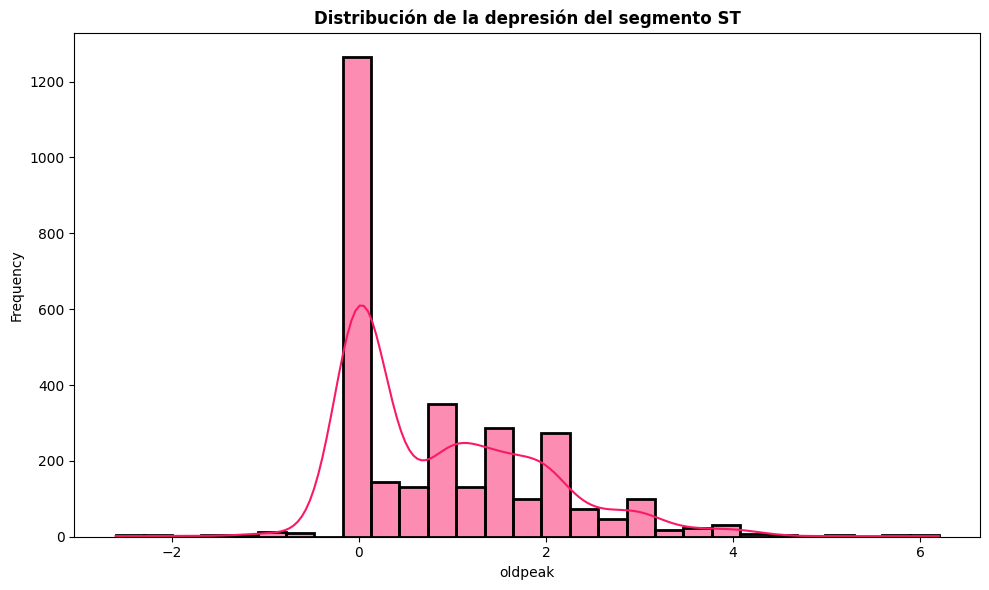

In [103]:
fig,ax = plt.subplots(figsize = (10,6))
sns.histplot(data= df,x='oldpeak',edgecolor='black',
             linewidth=2,
             color='#FA1A64',
             stat='frequency',
             kde=True)
plt.title('Distribución de la depresión del segmento ST',fontweight='bold')
plt.tight_layout()
plt.show()

heartdisease

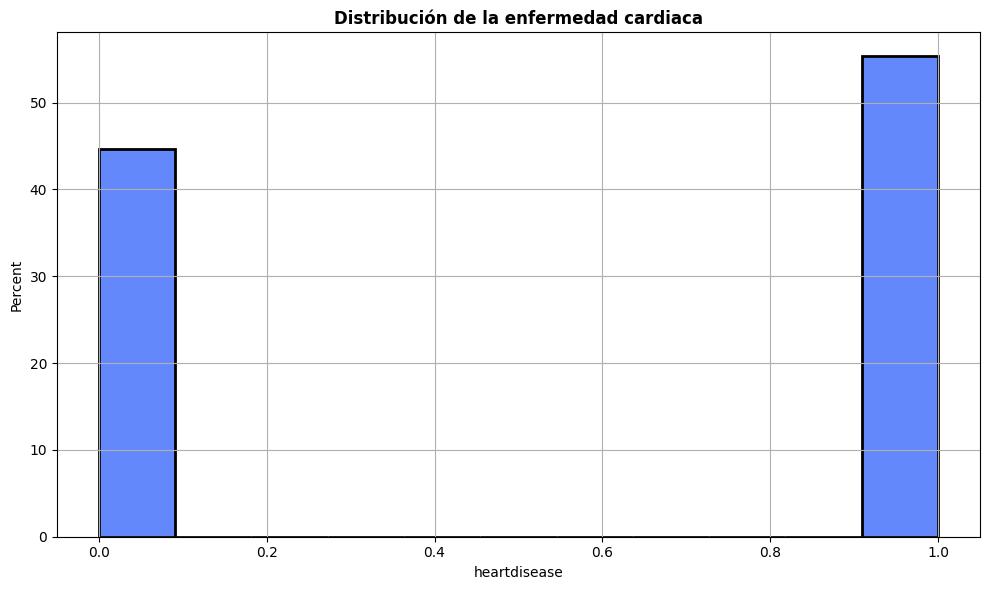

In [110]:
fig,ax = plt.subplots(figsize = (10,6))
sns.histplot(data= df,x='heartdisease',edgecolor='black',
             linewidth=2,
             color='#2F60FA',
             stat='percent',
             )
plt.title('Distribución de la enfermedad cardiaca',fontweight='bold')
plt.grid()
plt.tight_layout()
plt.show()

restingbp

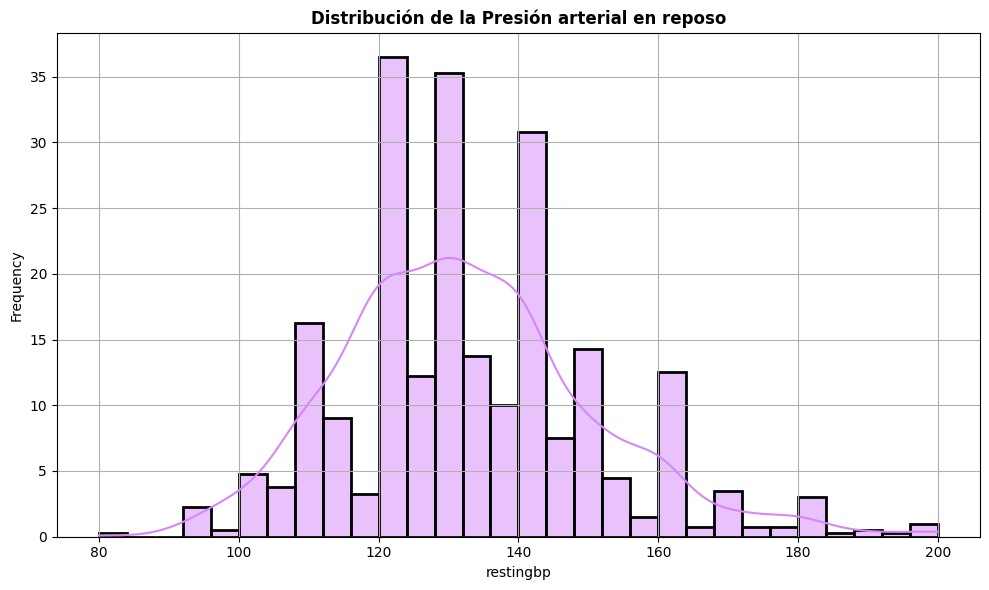

In [116]:
fig,ax = plt.subplots(figsize = (10,6))
sns.histplot(data= df,x='restingbp',edgecolor='black',
             linewidth=2,
             color='#D587FA',
             stat='frequency',
             kde=True)
plt.title('Distribución de la Presión arterial en reposo',fontweight='bold')
plt.grid()
plt.tight_layout()
plt.show()

cholesterol

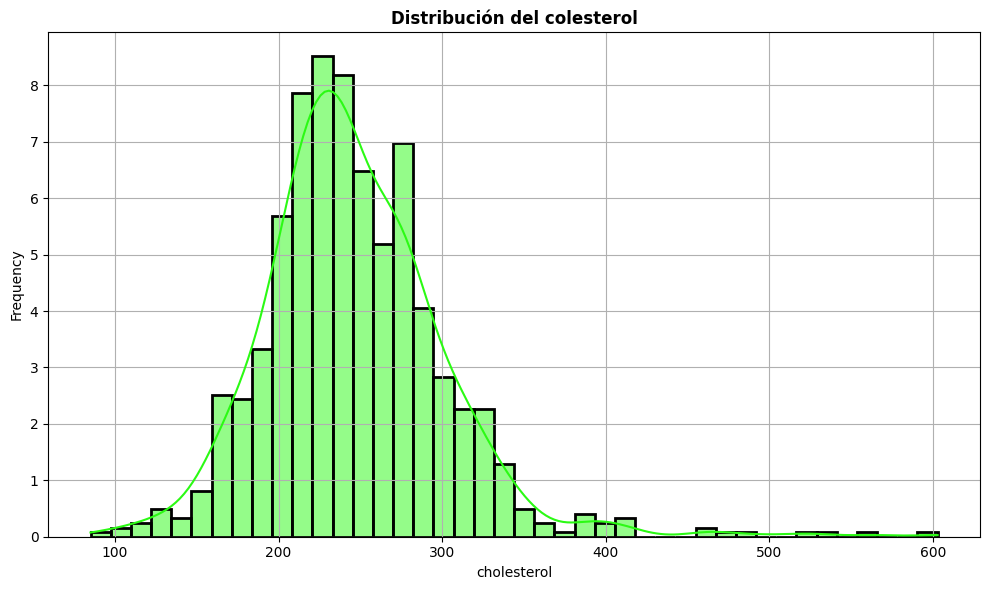

In [120]:
fig,ax = plt.subplots(figsize = (10,6))
sns.histplot(data= df,x='cholesterol',edgecolor='black',
             linewidth=2,
             color='#2BFA14',
             stat='frequency',
             kde=True)
plt.title('Distribución del colesterol',fontweight='bold')
plt.grid()
plt.tight_layout()
plt.show()

4. **Análisis Bivariado y Multivariado**

* Correlación entre variables

/tmp/ipykernel_997/1034024326.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(),annot=True,vmin=0,vmax=1,cmap='Blues',linewidths=2,fmt='.2f',linecolor='black')


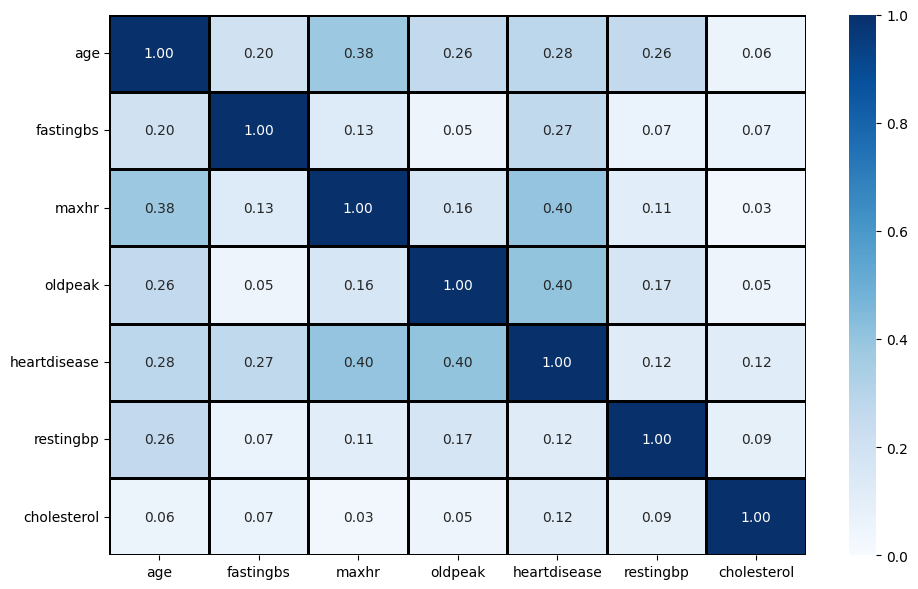

In [143]:
fig,ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr().abs(),annot=True,vmin=0,vmax=1,cmap='Blues',linewidths=2,fmt='.2f',linecolor='black')
plt.tight_layout()
plt.show()

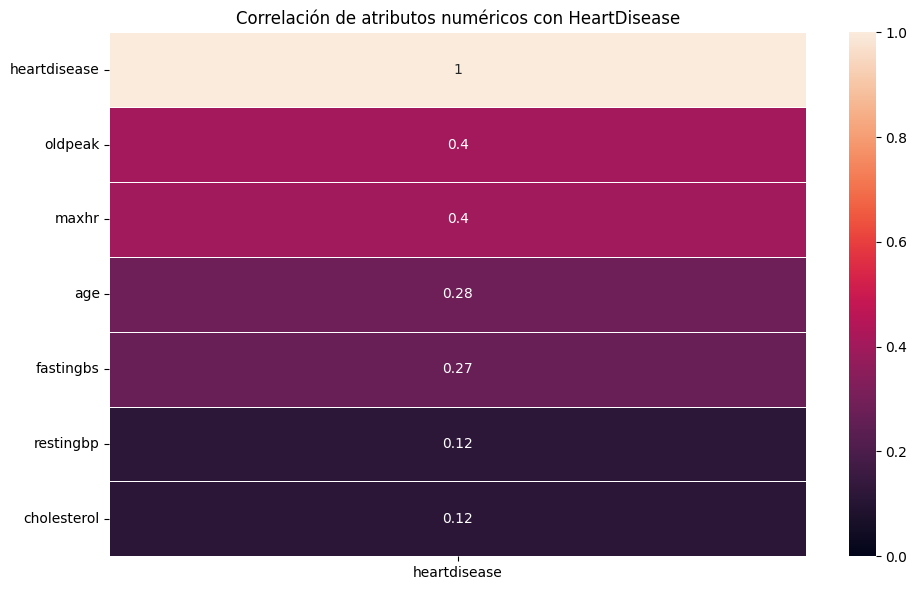

In [156]:
fig,ax = plt.subplots(figsize=(10,6))
sns.heatmap(data=df.corr(method="pearson", numeric_only=True).abs()[["heartdisease"]].sort_values('heartdisease', ascending=False), 
            vmin=0, vmax=1, 
            annot=True,
            linewidths=0.5
            )
plt.title("Correlación de atributos numéricos con HeartDisease")
plt.tight_layout()
plt.show()

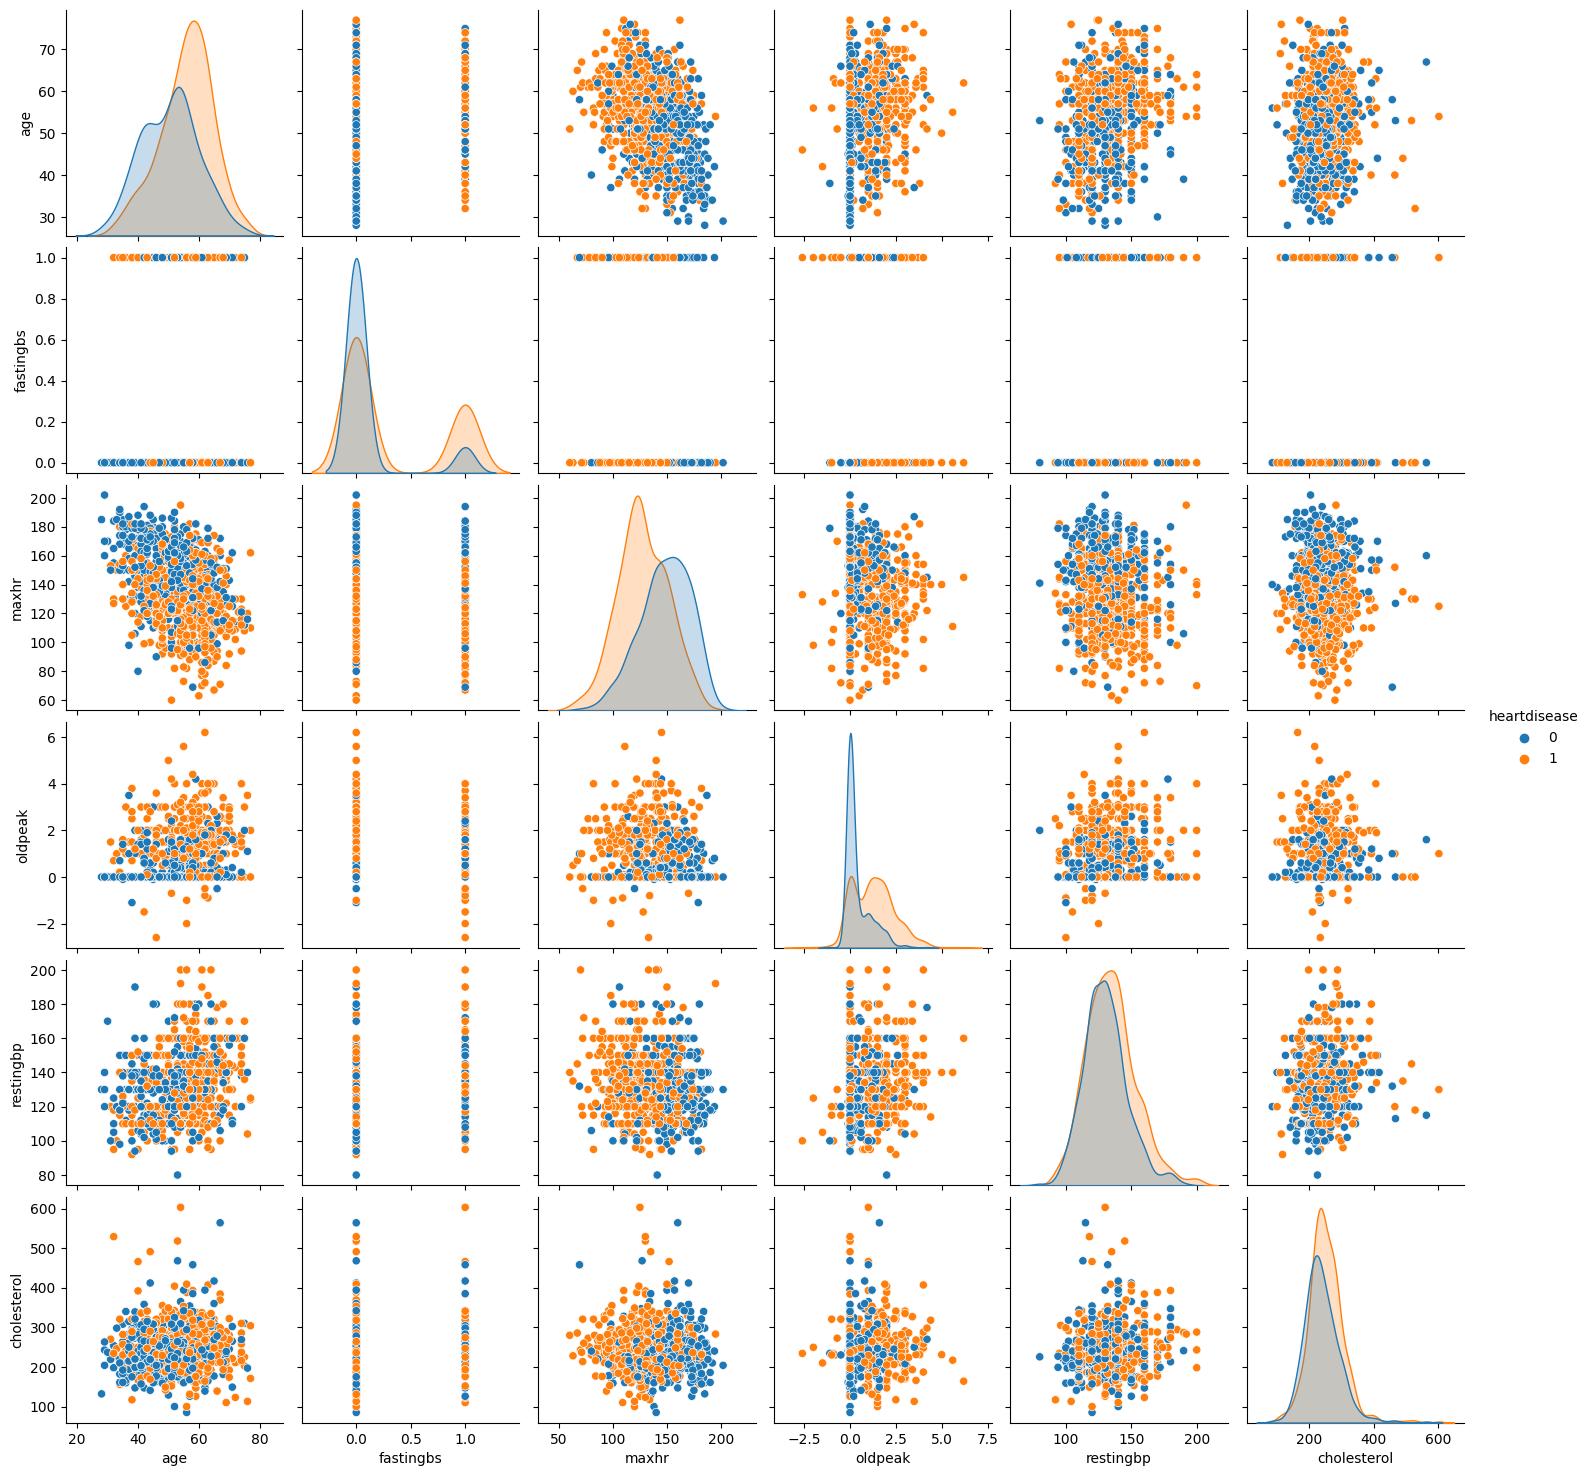

In [145]:
# ver imagen completa de la distribución de datos
# =======================================================================================
sns.pairplot(df, hue='heartdisease')
plt.show()

* Analisis Bivariado con respecto al target

**Modelo de clasificación de PyCaret**

In [196]:
#!pip install pycaret

In [197]:
from pycaret.classification import setup,models,compare_models,evaluate_model

PyCaret Setup

In [198]:
s = setup(data=df,target='heartdisease',
          ignore_features=['ejection_fraction'],
          categorical_features=['sex' ,'chestpaintype' ,'restingecg' ,'exerciseangina', 'st_slope'],
          normalize=True,
          normalize_method='minmax',
          train_size=0.9,
          verbose=1,
          session_id=42)

,Description,Value
0,Session id,42
1,Target,heartdisease
2,Target type,Binary
3,Original data shape,"(918, 12)"
4,Transformed data shape,"(918, 19)"
5,Transformed train set shape,"(826, 19)"
6,Transformed test set shape,"(92, 19)"
7,Ignore features,1
8,Ordinal features,2
9,Numeric features,6


In [199]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Getting best model

In [200]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:18:22
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8679,0.9234,0.8970,0.8697,0.8825,0.7317,0.7337,0.1190
lr,Logistic Regression,0.8581,0.9225,0.8881,0.8624,0.8744,0.7114,0.7131,0.2890
ridge,Ridge Classifier,0.8569,0.0000,0.8926,0.8583,0.8741,0.7086,0.7117,0.0330
lda,Linear Discriminant Analysis,0.8545,0.9221,0.8882,0.8577,0.8717,0.7038,0.7068,0.0340
gbc,Gradient Boosting Classifier,0.8534,0.9280,0.8729,0.8647,0.8680,0.7031,0.7049,0.0710
et,Extra Trees Classifier,0.8522,0.9115,0.8906,0.8529,0.8700,0.6991,0.7032,0.1080
ada,Ada Boost Classifier,0.8497,0.9101,0.8664,0.8658,0.8648,0.6956,0.6986,0.0610
knn,K Neighbors Classifier,0.8388,0.8868,0.8818,0.8404,0.8592,0.6712,0.6751,0.0370
svm,SVM - Linear Kernel,0.8365,0.0000,0.8494,0.8602,0.8522,0.6691,0.6746,0.0350
nb,Naive Bayes,0.8340,0.9092,0.8403,0.8588,0.8482,0.6651,0.6675,0.0340


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…